##  Problem Description  <a id="1"></a>

Business cycle describes the rise and fall in the growth of the economy that occurs over time. Each business cyle has two turning points trough (or bottom) and peak. Expansion is measured from the trough of the previous business cycle to the peak of the current cycle, while recession is measured from the peak to the trough. A representation of business cycles is shown in __[figure](https://courses.lumenlearning.com/baycollege-introbusiness/chapter/reading-the-business-cycle-definition-and-phases/)__ below. In the United States (US), the Business Cycle Dating Committee of the National Bureau of Economic Research (NBER) determines the dates for business cycles. The turning points are determined by considering monthly growth indicators of the economy such as industrial production, employment, real income. The main focus of business cycle analysis is to analyze why economy goes through contraction and expansion periods. It is a well-studied topic in the literature and still an active reserach area. In our work, we are going to predict recessions in US economy with leading macroeconomic indicators using machine learning algorithms.

Predicting business cycle turning points, especially economic recessions, is of great importance to investors, households, businesses in the economy.
Starting from &nbsp;[Mitchell and Burns (1938)](#a) pioneering work,  analyzing indicators of business cycles have become a core research area in business cycle analysis and there has been many work done in that field since then. Much of the work in the literature has indicated a wide range of economic and financial variables contain predictive information about future recessions in the economy.&nbsp;[Stock and Watson (1989)](#b) established coincedent and leading economic indicators for recession forecasting. &nbsp;[Estrella and Mishkin (1998)](#c) have documented predictive power of the slope of the term structure of Treasury yields and stock market for US recessions. 
&nbsp;[Liu and Moench (2016)](#f) have also showed the Treasury term spread has the highest predictive power with lagged abservations as well. Also, they indicated that balances in broker-dealer margin accounts have significant effect on recession predictions, especially in longer horizons.
&nbsp;[Chionis et al. (2009)](#d) worked on forecasting recessions in Europe with European Union (EU) data. They found out that the yield curve augmented with the composite stock index has significant predictive
power in terms of the EU real output.
&nbsp;[Ng (2014)](#e) worked on the problem through exploring effectiveness of boosting and found out interest rate measures and certain employment variables have predictive power for the recessions.
Recently, &nbsp;[Huang et al. (2018)](#g) have worked on predictive power of news sentiment analysis on recession forecasting in US economy. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
bigmacro=pd.read_csv("/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/Macroeconomic_Variables.csv")
bigmacro=bigmacro.rename(columns={'sasdate':'Date'})
bigmacro.head()

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,1/1/59,2437.296,2288.8,17.302,292258.8329,18235.77392,22.6248,23.4555,22.1893,32.4027,...,11.358,2.13,2.45,2.04,NaN,274.9,6476.0,12298.0,84.2043,NaN
1,2/1/59,2446.902,2297.0,17.482,294429.5453,18369.56308,23.0679,23.7720,22.3816,32.6404,...,11.375,2.14,2.46,2.05,NaN,276.0,6476.0,12298.0,83.5280,NaN
2,3/1/59,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4002,23.9159,22.4914,32.6404,...,11.395,2.15,2.45,2.07,NaN,277.4,6508.0,12349.0,81.6405,NaN
3,4/1/59,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8987,24.2613,22.8210,33.1553,...,11.436,2.16,2.47,2.08,NaN,278.1,6620.0,12484.0,81.8099,NaN
4,5/1/59,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2587,24.4628,23.0407,33.3137,...,11.454,2.17,2.48,2.08,95.3,280.1,6753.0,12646.0,80.7315,NaN


Consistent with the previous works in the literature, we use __[business cycle dating chronology provided by NBER](http://www.nber.org/cycles.html)__  which involves dates when recession began and ended in US economy. According to NBER's statistics we have 8 recession periods in our dataset where duration is changing from 6 to 18 months. We represent regimes as "Normal" and "Recession" in our dataset. 

In [3]:
Recession_periods=pd.read_csv('/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/Recession_Periods.csv')
bigmacro.insert(loc=1,column="Regime", value=Recession_periods['Regime'].values)
bigmacro.head()

,Date,Regime,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,1/1/59,Normal,2437.296,2288.8,17.302,292258.8329,18235.77392,22.6248,23.4555,22.1893,...,11.358,2.13,2.45,2.04,NaN,274.9,6476.0,12298.0,84.2043,NaN
1,2/1/59,Normal,2446.902,2297.0,17.482,294429.5453,18369.56308,23.0679,23.7720,22.3816,...,11.375,2.14,2.46,2.05,NaN,276.0,6476.0,12298.0,83.5280,NaN
2,3/1/59,Normal,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4002,23.9159,22.4914,...,11.395,2.15,2.45,2.07,NaN,277.4,6508.0,12349.0,81.6405,NaN
3,4/1/59,Normal,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8987,24.2613,22.8210,...,11.436,2.16,2.47,2.08,NaN,278.1,6620.0,12484.0,81.8099,NaN
4,5/1/59,Normal,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2587,24.4628,23.0407,...,11.454,2.17,2.48,2.08,95.3,280.1,6753.0,12646.0,80.7315,NaN


In [4]:
bigmacro[["Date","Regime"]].groupby("Regime").count()

,Date
Regime,
Normal,628
Recession,93


### Data Preprocessing

1. Remove the variables with missing observations
2. Add lags of the variables as additional features
3. Test stationarity of time series
4. Standardize the dataset

In [5]:
#remove columns with missing observations
missing_colnames=[]
for i in bigmacro.drop(['Date','Regime'],axis=1):
    observations=len(bigmacro)-bigmacro[i].count()
    if (observations>10):
        print(i+':'+str(observations))
        missing_colnames.append(i)

bigmacro=bigmacro.drop(labels=missing_colnames, axis=1)

#rows with missing values
bigmacro=bigmacro.dropna(axis=0)

bigmacro.shape

PERMIT:13
PERMITNE:13
PERMITMW:13
PERMITS:13
PERMITW:13
ACOGNO:398
ANDENOx:110
TWEXMMTH:168
UMCSENTx:155
VXOCLSx:42


(718, 120)

In [6]:
# Add lags
for col in bigmacro.drop(['Date', 'Regime'], axis=1):
    for n in [3,6,9,12,18]:
        bigmacro['{} {}M lag'.format(col, n)] = bigmacro[col].shift(n).ffill().values

# 1 month ahead prediction
bigmacro["Regime"]=bigmacro["Regime"].shift(-1)

bigmacro=bigmacro.dropna(axis=0)

In [7]:
bigmacro.shape

(699, 710)

Augmented Dickey-Fuller Test can be used to test for stationarity in macroeconomic time series variables. We will use `adfuller` function from `statsmodels` module in Python. More information about the function can be found __[here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)__.

In [8]:
#check stationarity
from statsmodels.tsa.stattools import adfuller #to check unit root in time series 
threshold=0.01 #significance level
for column in bigmacro.drop(['Date','Regime'], axis=1):
    result=adfuller(bigmacro[column])
    if result[1]>threshold:
        bigmacro[column]=bigmacro[column].diff()
bigmacro=bigmacro.dropna(axis=0)

In [9]:
threshold=0.01 #significance level
for column in bigmacro.drop(['Date','Regime'], axis=1):
    result=adfuller(bigmacro[column])
    if result[1]>threshold:
        bigmacro[column]=bigmacro[column].diff()
bigmacro=bigmacro.dropna(axis=0)

In [10]:
threshold=0.01 #significance level
for column in bigmacro.drop(['Date','Regime'], axis=1):
    result=adfuller(bigmacro[column])
    if result[1]>threshold:
        print(column)
bigmacro=bigmacro.dropna(axis=0)   

CES0600000008 6M lag


In [11]:
# Standardize
from sklearn.preprocessing import StandardScaler
features=bigmacro.drop(['Date','Regime'],axis=1)
col_names=features.columns

scaler=StandardScaler()
scaler.fit(features)
standardized_features=scaler.transform(features)
standardized_features.shape
df=pd.DataFrame(data=standardized_features,columns=col_names)
df.insert(loc=0,column="Date", value=bigmacro['Date'].values)
df.insert(loc=1,column='Regime', value=bigmacro['Regime'].values)
df.head()
df.shape

(697, 710)

In [12]:
df.to_csv("/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/Dataset_Cleaned.csv", index=False)

In [26]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



from matplotlib import pyplot as mp
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

!python -m pip install xgboost


In [14]:
df=pd.read_csv('/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/Dataset_Cleaned.csv')

Label = df["Regime"].apply(lambda regime: 1. if regime == 'Normal' else 0.)
df.insert(loc=2, column="Label", value=Label.values)

df.head()


,Date,Regime,Label,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,...,DTCTHFNM 3M lag,DTCTHFNM 6M lag,DTCTHFNM 9M lag,DTCTHFNM 12M lag,DTCTHFNM 18M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,INVEST 18M lag
0,9/1/60,Recession,0.0,-0.277761,-0.295013,-0.212118,0.401363,-0.321981,-0.764446,-0.632790,...,-0.076853,-0.092745,-0.087114,-0.085455,-0.099002,-0.454463,-0.566992,-0.395095,-0.450998,-0.089005
1,10/1/60,Recession,0.0,-0.204460,-0.161434,-0.204519,-0.978339,-0.239615,-0.308591,0.059474,...,-0.081327,-0.084890,-0.103429,-0.089335,-0.090643,-0.255545,-0.415804,-0.483302,-0.473520,0.147174
2,11/1/60,Recession,0.0,-0.520186,-0.577658,-0.785798,-0.611700,-0.435990,-0.935469,-0.748034,...,-0.084509,-0.087674,-0.095868,-0.095503,-0.087956,-0.404823,-0.392308,-0.605015,-0.445070,-0.091651
3,12/1/60,Recession,0.0,-0.531320,-0.581530,-1.397470,0.071269,-0.375495,-1.163499,-0.921200,...,-0.095048,-0.076637,-0.094476,-0.087146,-0.076214,-0.331993,-0.453979,-0.578110,-0.389378,-0.070555
4,1/1/61,Normal,1.0,0.054513,0.096044,-0.375484,-1.608684,-0.307555,-0.194576,-0.286457,...,-0.103002,-0.081112,-0.086616,-0.103462,-0.076910,-0.250758,-0.253854,-0.425585,-0.477942,0.167308


In [15]:
df.tail()

,Date,Regime,Label,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,...,DTCTHFNM 3M lag,DTCTHFNM 6M lag,DTCTHFNM 9M lag,DTCTHFNM 12M lag,DTCTHFNM 18M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,INVEST 18M lag
692,5/1/18,Normal,1.0,-0.158774,-0.087869,0.961837,0.428800,2.458364,-2.071505,-3.897094,...,-0.482484,0.035214,-0.213850,0.107884,-0.230363,-2.969053,0.961673,0.029818,0.229887,-2.082950
693,6/1/18,Normal,1.0,0.349410,0.372881,0.885853,0.063037,0.230187,1.119480,1.231754,...,-0.658796,-0.179194,-0.133821,0.236277,-0.197709,-1.758884,2.236719,0.274491,-1.001393,-0.345305
694,7/1/18,Normal,1.0,0.225752,0.198647,0.954238,0.150980,1.059808,0.675562,-0.051761,...,0.108564,-0.311340,-0.144057,-0.120563,-0.293692,-1.727882,-0.918590,0.481157,-0.256506,1.560538
695,8/1/18,Normal,1.0,0.496621,0.504524,0.802270,0.788034,-0.474700,1.659097,0.954768,...,0.104177,-0.482299,0.033552,-0.213885,-0.613278,0.143563,-2.983834,0.964076,0.037260,0.000571
696,9/1/18,Normal,1.0,-0.077029,-0.231128,-0.561645,0.393889,-0.817945,0.153438,0.379952,...,-0.324269,-0.658623,-0.180970,-0.133855,-0.085913,2.453857,-1.766319,2.250399,0.282925,-0.081374


### Methodology

1. We will perform feature selection before making our forecasts. We will use $L_1$ regularized logistic regression for that purpose.

2. Separate dataset into training and validation datasets. Split based dataset based on time: the period over 1960-1996 is selected for training and the period over 1996-2018 is kept for validation

3. Evaluate performances of the machine learning algorithms on training dataset with cross validation (CV). Since we have time series structure we will use a special type of CV function in Python,__[`TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit)__. We will use Receiver operating characteristic (ROC) as scoring metric in our models. Related Python functions for this metric are __[`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)__  and  __[`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)__.

4. Select the best performing models based on average accuracy and standard deviation of the CV results. We will take logistic regression as a benchmark model since this is the traditional method has been used to approach this problem.

5. Then we make predictions on the validation dataset with selected models. First, we use __[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)__ for selected model on training dataset to find best combination of parameters for the model. Then we evaluate the model on validation dataset and report accuracy metrics and feature importance results.

## 3. Feature Selection with $L_1$ Penalty <a id="3"></a>

In [16]:
# Time Series Split
df_idx = df[df.Date == '12/1/96'].index[0]

df_targets=df['Label'].values
df_features=df.drop(['Regime','Date','Label'], axis=1)

df_training_features = df.iloc[:df_idx,:].drop(['Regime','Date','Label'], axis=1)
df_validation_features = df.iloc[df_idx:, :].drop(['Regime','Date','Label'], axis=1)

df_training_targets = df['Label'].values
df_training_targets=df_training_targets[:df_idx]

df_validation_targets = df['Label'].values
df_validation_targets=df_validation_targets[df_idx:]


In [17]:
print(len(df_training_features),len(df_training_targets),len(df_targets))
print(len(df_validation_features),len(df_validation_targets),len(df_features))

435 435 697
262 262 697


In [18]:
scoring="roc_auc"
kfold= model_selection.TimeSeriesSplit(n_splits=3)
seed=8

# Create regularization hyperparameter space
C = np.reciprocal([0.00000001, 0.00000005, 0.0000001, 0.0000005, 0.000001, 0.000005, 0.00001, 0.00005, 
                         0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000])

# Create hyperparameter options
hyperparameters = dict(C=C)

model=LogisticRegression(max_iter=10000,penalty='l1')
LR_penalty=model_selection.GridSearchCV(estimator=model, param_grid= hyperparameters,
                                        cv=kfold, scoring=scoring).fit(X=df_features,
                                                                       y=df_targets).best_estimator_

LR_penalty

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
X=df_features
y=df_targets
lr_l1 = LogisticRegression(C=0.1, max_iter=10000,penalty="l1").fit(X,y)
model = SelectFromModel(lr_l1,prefit=True)
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]
X_new = model.transform(X)
X_new.shape

(697, 34)

In [20]:
feature_name

Index(['DPCERA3M086SBEA', 'IPFPNSS', 'IPMANSICS', 'HWI', 'UNRATE', 'PAYEMS',
       'SRVPRD', 'USTPU', 'USWTRADE', 'USFIRE', 'HOUST', 'HOUSTW',
       'S&P div yield', 'TB3MS', 'TB3SMFFM', 'IPMAT 9M lag', 'IPDMAT 12M lag',
       'CLAIMSx 9M lag', 'DMANEMP 12M lag', 'USFIRE 3M lag', 'AWOTMAN 18M lag',
       'BUSLOANS 6M lag', 'S&P 500 6M lag', 'S&P div yield 3M lag',
       'TB3MS 6M lag', 'AAA 3M lag', 'TB3SMFFM 3M lag', 'T1YFFM 6M lag',
       'T10YFFM 6M lag', 'T10YFFM 12M lag', 'EXUSUKx 12M lag',
       'WPSID62 9M lag', 'OILPRICEx 9M lag', 'CUSR0000SAD 3M lag'],
      dtype='object')

In [21]:
df_2=df[feature_name]
df_2.insert(loc=0, column="Date", value=df['Date'].values)
df_2.insert(loc=1, column="Regime", value=df['Regime'].values)
df_2.insert(loc=2, column="Label", value=df['Label'].values)

df_2.head()
df_2.shape

(697, 37)

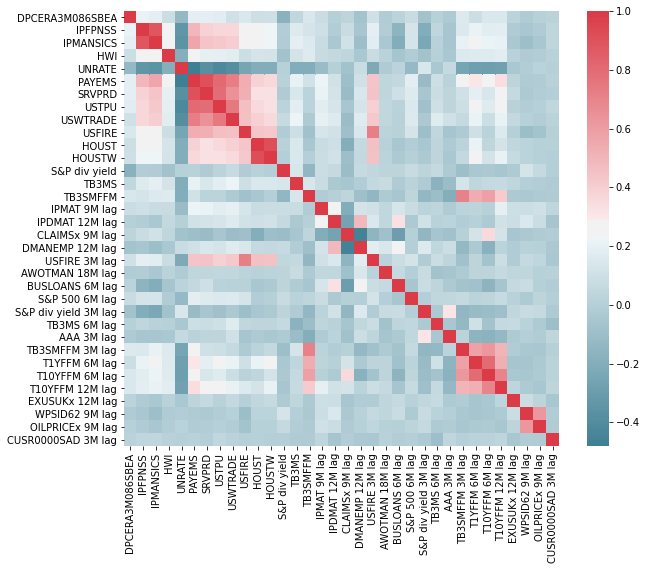

In [22]:
corr = df_2.drop(['Date','Regime','Label'],axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

## Train the dataset


In [23]:
df=df_2
df.shape

(697, 37)

In [24]:
# Time Series Split
df_idx = df[df.Date == '12/1/96'].index[0]

df_targets=df['Label'].values
df_features=df.drop(['Regime','Date','Label'], axis=1)

df_training_features = df.iloc[:df_idx,:].drop(['Regime','Date','Label'], axis=1)
df_validation_features = df.iloc[df_idx:, :].drop(['Regime','Date','Label'], axis=1)

df_training_targets = df['Label'].values
df_training_targets=df_training_targets[:df_idx]

df_validation_targets = df['Label'].values
df_validation_targets=df_validation_targets[df_idx:]



LR: 0.875915 (0.046200)
LR_L1: 0.934921 (0.031076)
LR_L2: 0.927990 (0.040885)
LDA: 0.849343 (0.064691)
KNN: 0.823909 (0.133418)
GB: 0.801855 (0.116745)
ABC: 0.862792 (0.070321)
RF: 0.885263 (0.054804)
[21:35:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:35:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:35:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met

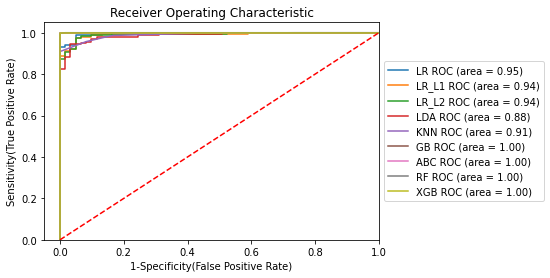

In [27]:
seed=8
scoring='roc_auc' 
kfold = model_selection.TimeSeriesSplit(n_splits=3) 
models = []

models.append(('LR', LogisticRegression(C=1e09)))
models.append(('LR_L1', LogisticRegression(penalty = 'l1')))
models.append(('LR_L2', LogisticRegression(penalty = 'l2')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', xgb.XGBClassifier()))

results = []
names = []
lb = preprocessing.LabelBinarizer()

for name, model in models:
    cv_results = model_selection.cross_val_score(estimator = model, X = df_training_features, 
                                                 y = lb.fit_transform(df_training_targets), cv=kfold, scoring = scoring)
    
    model.fit(df_training_features, df_training_targets) # train the model
    fpr, tpr, thresholds = metrics.roc_curve(df_training_targets, model.predict_proba(df_training_features)[:,1])
    auc = metrics.roc_auc_score(df_training_targets,model.predict(df_training_features))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 
warnings.filterwarnings('ignore')

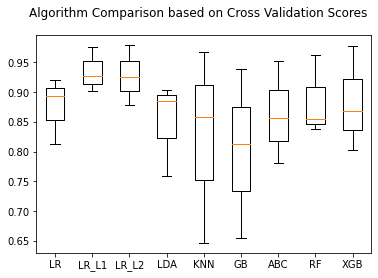

In [28]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison based on Cross Validation Scores')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Evaluate performance using validation dataset

## Logistic Regression

Logistic regression is the most commonly used statistical model for binary classification. It uses the logit model of relating log-odds of the dependent variable linearly with the predictor (explanatory) variables to learn a form of the following logistic function that is used to separate instances of the two different classes. 

\begin{align*}
Pr(y=1|x) = h_\beta(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  x)}} \text{ where $\beta_0$ is the intercept and $\beta$ is the vector of trained weights}
\end{align*}

The function returns a probability measure of which class a new instance is given its features, this measure is then used to make the final classification with some probability threshold, traditionally being 0.5.

The specific logistic function is learned through gradient descent which focuses on minimizing error calculated through some cost function. A typical approach is to use the following maximum-likelihood estimator to minimize error in predicted probabilities.

\begin{align*}
& J(\beta) = -\frac{1}{N}\sum_{i=1}^Ny_ilog(h_\beta(x_i)) + (1 - y_i)log(1 - h_\beta(x_i)) \\
& \text{ where $N$ is the number of observations, $h_\beta(x)$ is as defined above, and $y_i$ is the predicted class}
\end{align*}

A regularization term 

\begin{align*}
\lambda\sum_{i=1}^N|\beta_i| \text{ where $\lambda$ is a regularization parameter, }
\end{align*}

is often added to the cost function to prevent overfitting by penalizing large coefficients. This regularization can be L1 or L2 penalty depending on the problem at hand.

In [29]:
model=LogisticRegression(C=1e09) # high penalty 
LR=model.fit(df_training_features,df_training_targets)
training_predictions=LR.predict(df_training_features)
prob_predictions = LR.predict_proba(df_training_features)
prob_predictions = np.append(prob_predictions, LR.predict_proba(df_validation_features), axis=0)

In [30]:
import datetime
# define periods of recession
rec_spans = []
#rec_spans.append([datetime.datetime(1957,8,1), datetime.datetime(1958,4,1)])
rec_spans.append([datetime.datetime(1960,4,1), datetime.datetime(1961,2,1)])
rec_spans.append([datetime.datetime(1969,12,1), datetime.datetime(1970,11,1)])
rec_spans.append([datetime.datetime(1973,11,1), datetime.datetime(1975,3,1)])
rec_spans.append([datetime.datetime(1980,1,1), datetime.datetime(1980,6,1)])
rec_spans.append([datetime.datetime(1981,7,1), datetime.datetime(1982,10,1)])
rec_spans.append([datetime.datetime(1990,7,1), datetime.datetime(1991,2,1)])
rec_spans.append([datetime.datetime(2001,3,1), datetime.datetime(2001,10,1)])
rec_spans.append([datetime.datetime(2007,12,1), datetime.datetime(2009,5,1)])

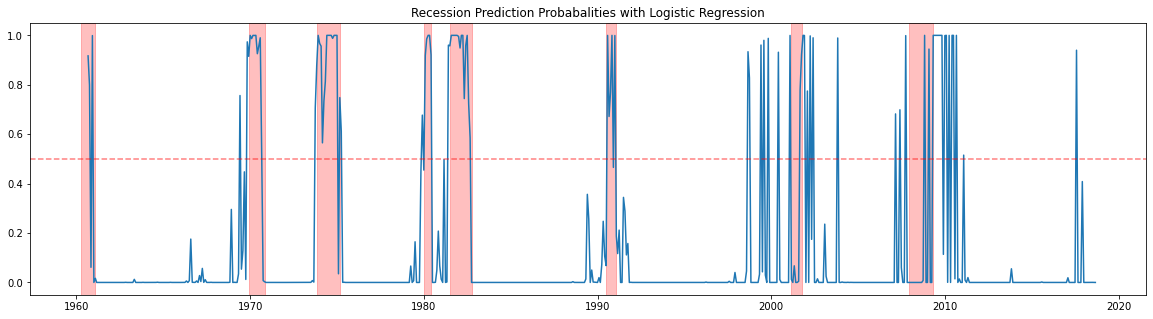

In [33]:
sample_range = pd.date_range(start='9/1/1960', end='9/1/2018', freq='MS')

plt.figure(figsize=(20,5))
plt.plot(sample_range.to_series().values, prob_predictions[:,0])
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='red')
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.title('Recession Prediction Probabalities with Logistic Regression')
mp.savefig('plot1.png',  bbox_inches='tight')
plt.show()

### Logistic Regression with Regularization

In [34]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.reciprocal([0.00000001, 0.00000005, 0.0000001, 0.0000005, 0.000001, 0.000005, 0.00001, 0.00005, 
                         0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000])

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


model=LogisticRegression(max_iter=10000)
LR_penalty=model_selection.GridSearchCV(estimator=model, param_grid= hyperparameters,
                                        cv=kfold, scoring=scoring).fit(df_training_features,
                                                                       df_training_targets).best_estimator_
training_predictions=LR_penalty.predict(df_training_features)

In [35]:
prob_predictions = LR_penalty.predict_proba(df_training_features)
prob_predictions = np.append(prob_predictions, LR_penalty.predict_proba(df_validation_features), axis=0)

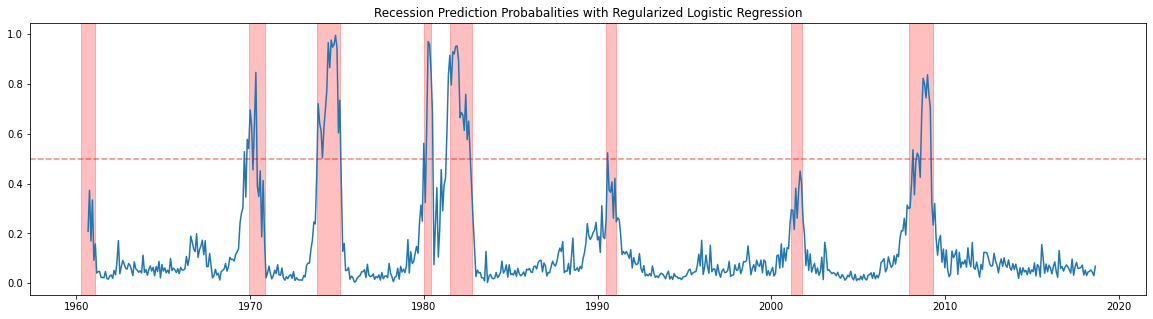

In [36]:
sample_range = pd.date_range(start='9/1/1960', end='9/1/2018', freq='MS')

plt.figure(figsize=(20,5))
plt.plot(sample_range.to_series().values, prob_predictions[:,0])
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='red')
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.title('Recession Prediction Probabalities with Regularized Logistic Regression')
mp.savefig('plot2.png',  bbox_inches='tight')
plt.show()

### XGBoosting

In [37]:
xgboost = model_selection.GridSearchCV(estimator=xgb.XGBClassifier(),
                                       param_grid={'booster': ['gbtree']},
                                       scoring=scoring, cv=kfold).fit(df_training_features, 
                                                                      lb.fit_transform(df_training_targets)).best_estimator_
xgboost.fit(df_training_features, df_training_targets)

[21:46:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=12, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [38]:
prob_predictions = xgboost.predict_proba(df_training_features)
prob_predictions = np.append(prob_predictions, xgboost.predict_proba(df_validation_features), axis=0)

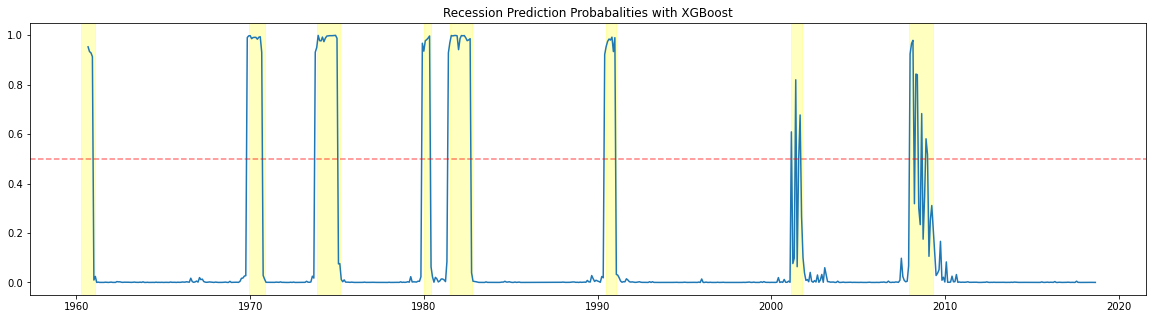

In [39]:
sample_range = pd.date_range(start='9/1/1960', end='9/1/2018', freq='MS')

plt.figure(figsize=(20,5))
plt.plot(sample_range.to_series().values, prob_predictions[:,0])
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='yellow')
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.title('Recession Prediction Probabalities with XGBoost')
mp.savefig('plot3.png',  bbox_inches='tight')
plt.show()

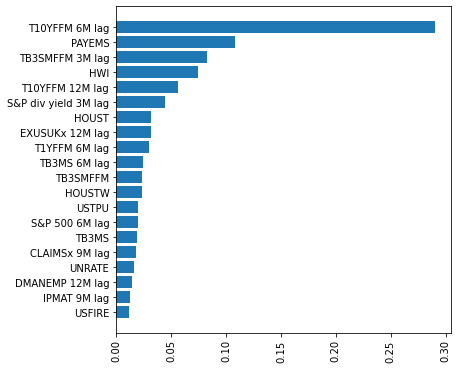

In [40]:
# find feature importances
headers = df.drop(['Regime','Label', 'Date'], axis=1).columns.values.tolist()
xgboost_importances = pd.DataFrame(xgboost.feature_importances_, index = headers, columns = ['Relative Importance'])
_ = xgboost_importances.sort_values(by = ['Relative Importance'], ascending = False, inplace=True)
xgboost_importances = xgboost_importances[xgboost_importances['Relative Importance']>0].iloc[:20]

# display importances in bar-chart and pie-chart
fig = plt.figure(figsize=(6,6))
plt.xticks(rotation='90')
plt.barh(y=np.arange(len(xgboost_importances)), width=xgboost_importances['Relative Importance'], align='center', tick_label=xgboost_importances.index)
plt.gca().invert_yaxis()
mp.savefig('feature_importance.png',  bbox_inches='tight')
plt.show()

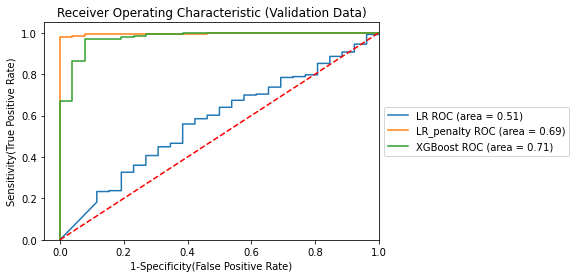

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(df_validation_targets, LR.predict_proba(df_validation_features)[:,1])
auc = metrics.roc_auc_score(df_validation_targets,LR.predict(df_validation_features))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LR', auc))

fpr, tpr, thresholds = metrics.roc_curve(df_validation_targets, LR_penalty.predict_proba(df_validation_features)[:,1])
auc = metrics.roc_auc_score(df_validation_targets,LR_penalty.predict(df_validation_features))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LR_penalty', auc))

fpr, tpr, thresholds = metrics.roc_curve(df_validation_targets, xgboost.predict_proba(df_validation_features)[:,1])
auc = metrics.roc_auc_score(df_validation_targets,xgboost.predict(df_validation_features))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('XGBoost', auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic (Validation Data)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mp.savefig('ROC1.png',  bbox_inches='tight')
plt.show() 

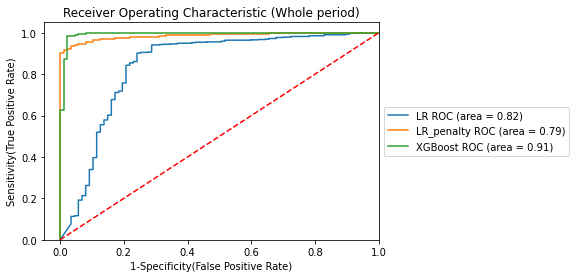

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(df_targets, LR.predict_proba(df_features)[:,1])
auc = metrics.roc_auc_score(df_targets,LR.predict(df_features))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LR', auc))


fpr, tpr, thresholds = metrics.roc_curve(df_targets, LR_penalty.predict_proba(df_features)[:,1])
auc = metrics.roc_auc_score(df_targets,LR_penalty.predict(df_features))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LR_penalty', auc))

fpr, tpr, thresholds = metrics.roc_curve(df_targets, xgboost.predict_proba(df_features)[:,1])
auc = metrics.roc_auc_score(df_targets,xgboost.predict(df_features))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('XGBoost', auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic (Whole period)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mp.savefig('ROC2.png',  bbox_inches='tight')
plt.show() 

## Introduction to Economic Regimes <a class="anchor" id="1"></a>

A regime is a period of time in which the characteristics of market performance and related economic activity are reasonably stable. 

For better analysis of the market, we would like to catagorize historical periods into a small number of regimes and evaluate each regime separately.

Let us plot the historical performance of the US stock market index (S&P 500) with regimes that we have determined. You will learn how to determine the regimes later in this chapter, so hang tight with us.

In [43]:
asset_data = pd.read_csv("data/Assets_7.csv", index_col=0, header=0,parse_dates=[0])
asset_data.index = pd.to_datetime(asset_data.index,format="%Y-%m").to_period("M")
asset_data.head()

,US Equities,World Equities,US Treasuries,High Yield,Real Estate,Commodities,Corp Bonds,T-bill,TIPS,Regime-5,Regime-7,Regime-9
1985-01,3.69,443.231,100.0000,112.905,382.65,769.53,245.62,564.0916,0.30%,1,1,1
1985-02,3.99,455.868,101.9243,117.185,404.31,785.96,252.75,567.9944,-1.12%,1,1,1
1985-03,4.11,451.672,100.1330,118.672,410.96,774.00,246.33,571.6528,1.61%,1,1,1
1985-04,4.08,485.608,102.0311,119.185,408.20,802.77,251.11,575.8523,2.37%,1,1,1
1985-05,4.03,484.414,104.1377,121.356,408.57,774.58,256.72,579.6807,5.26%,1,1,1


In [44]:
import Module_1 as mod1

In [45]:
rets = mod1.compute_returns( asset_data.iloc[:,range(8)] )
rets = pd.concat([rets, asset_data.iloc[:,[8,9,10,11]]], axis=1).dropna() # dropping first row with NaN rets
rets.head()

,US Equities,World Equities,US Treasuries,High Yield,Real Estate,Commodities,Corp Bonds,T-bill,TIPS,Regime-5,Regime-7,Regime-9
1985-02,0.081301,0.028511,0.019243,0.037908,0.056605,0.021351,0.029029,0.006919,-1.12%,1,1,1
1985-03,0.030075,-0.009204,-0.017575,0.012689,0.016448,-0.015217,-0.025401,0.006441,1.61%,1,1,1
1985-04,-0.007299,0.075134,0.018956,0.004323,-0.006716,0.037171,0.019405,0.007346,2.37%,1,1,1
1985-05,-0.012255,-0.002459,0.020647,0.018215,0.000906,-0.035116,0.022341,0.006648,5.26%,1,1,1
1985-06,0.064516,0.040245,0.048570,0.042363,0.027241,0.004351,0.063610,0.006858,3.97%,1,1,1


In [46]:
# separate dataframe with respect to returns from a regular and crash regime given a regime vector
regime_name = "Regime-5"
rets_g = rets[rets[regime_name]==1]
rets_c = rets[rets[regime_name]==-1]

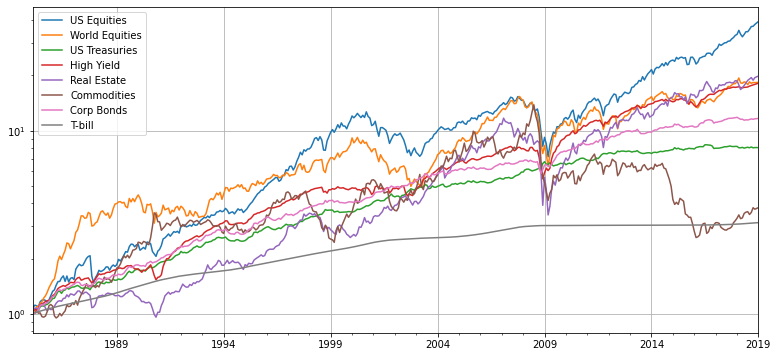

In [47]:
# plot asset wealths
( 1 + rets.iloc[:,range(8)] ).cumprod().plot(grid=True, figsize=(13,6), logy=True)
plt.show()

In [48]:
mod1.summary_stats(rets.iloc[:,range(8)], risk_free_rate=0.0, periods_per_year=12)

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
US Equities,0.114126,0.155216,0.735270,-0.848029,6.249882,0.105823,0.070790,-0.530930
World Equities,0.089324,0.172688,0.517258,-0.402266,4.263287,0.113194,0.077762,-0.581763
US Treasuries,0.063357,0.046847,1.352412,0.238472,4.245303,0.022563,0.015725,-0.052445
High Yield,0.088982,0.082462,1.079061,-0.823557,11.658134,0.054620,0.032802,-0.333846
Real Estate,0.091857,0.189075,0.485823,-0.310908,19.034763,0.121518,0.067865,-0.703818
Commodities,0.040027,0.202868,0.197304,-0.407513,4.983119,0.133001,0.095442,-0.811461
Corp Bonds,0.074893,0.054117,1.383913,-0.360710,6.263009,0.029775,0.020041,-0.156373
T-bill,0.034262,0.007555,4.535324,0.168063,1.810217,-0.000017,0.000716,0.000000


In [83]:
#asset_name = "High Yield"
asset_name = "US Treasuries"
#asset_name = "T-bill"
#asset_name = "US Equities"

In [84]:
import ml_asset_kit as mla

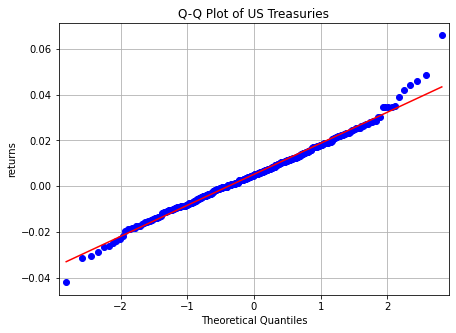

In [85]:
# Quantile-Quantile plot of assets
mla.qqplot(rets[asset_name], linetype="r")

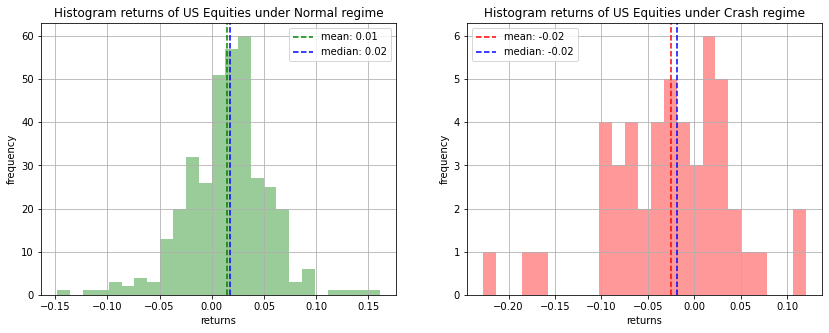

In [55]:
# Histogram returns of normal and crash regimes 
regime = rets["Regime-5"]
asset_rets = rets[asset_name]
ax = mla.regime_hist(asset_rets, regime)

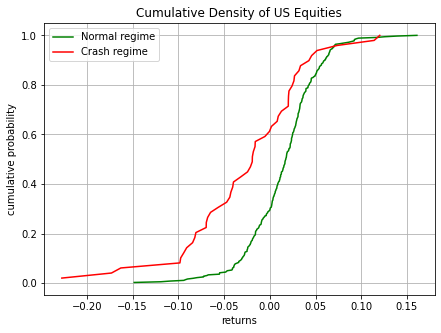

In [56]:
# Cumulative Distribution functions plot of the normal and crash regimes
ax = mla.regime_plot_cdf(rets_g[asset_name], rets_c[asset_name])

We can observe that the monthly return distribution of World Equities is very different under growth regime or contraction regime. 


## Identification of Regimes 

A **regime analysis** is significant in asset allocation and asset-liability management for long-term investors because of **the contagion** and related effects during crash periods: **the correlation between risky assets and volatility will greatly increase during the crash periods**, thus creating severe difficulty in risk management and protecting investor capital with traditional portfolio models.

Many existing methods are based on econometric models which assume a fixed structural model. However, financial return or macroeconomic data tends to be noisy and affected by myriad of factors. The state-of-the-art approach discussed in Mulvey and Liu (2016), **trend-filtering**, is non-parametric, data-driven and model-free. The algorithm was first introduced by Kim et al. (2009) and generalised in Tibshirani (2014).

In this part, we will implement the algorithm to obtain regimes of U.S. equity. First, we need the relevant packages and data.

In [59]:
# Import S&P500
sp500 = pd.read_csv("/Users/r.shyaamprasadh/Downloads/Python and Machine Learning for Asset  Management/SP500.csv", index_col=0, header=0, parse_dates=[0])
sp500.columns = ["rets","value"]
sp500["rets"] = sp500["rets"] / 100
sp500.index = pd.to_datetime(sp500.index, format="%Y-%m").to_period("M")
sp500.index = sp500.index.rename("date")
sp500.head()

,rets,value
date,,
1985-01,0.005585,84.7932
1985-02,0.074747,91.1312
1985-03,0.055791,96.2155
1985-04,-0.011260,95.1321
1985-05,0.053201,100.1932


In the **trend-filtering algorithm**, we manage to find some **fitted time series** that serves as the signal of the trend. This new time series can be obtained by solving the following optimization problem:
$$
\hat{\beta} = \text{argmin}_{\beta \in \mathbb{R}^n} ||x-\beta||_2^2 + \lambda||D\beta||_1 .
$$
where
$$
D =
    \begin{pmatrix}
       1 & -1 & 0 & \dots & 0 & 0  \\
       0  & 1 &-1 & \dots & 0 & 0 \\
       \vdots \\
       0  & 0 & 0 & \dots & -1 & 0\\
       0  & 0 & 0 & \dots & 1 & -1
    \end{pmatrix}
\in \mathbb{R}^{(n-1)\times n}.
$$

In [60]:
lambda_value = 0.11

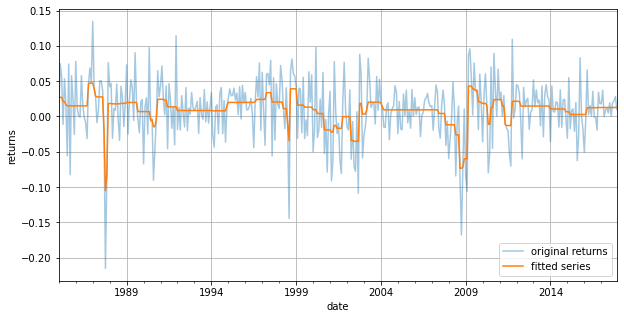

In [61]:
ax = mla.trend_filtering_plot(sp500["rets"], lambda_value=lambda_value, figx=10, figy=5)

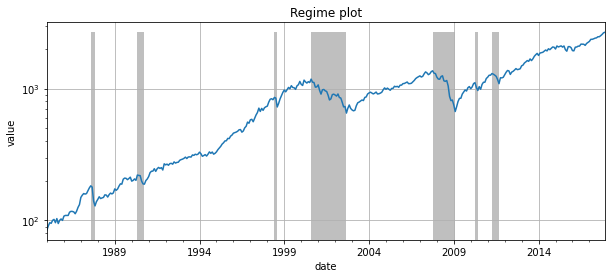

In [62]:
ax = mla.plot_regime_color(sp500["value"], lambda_value=lambda_value, figx=10, figy=4)

In [63]:
regimes = rets.iloc[:,range(9,12)]
regime_name = "Regime-5"

In [64]:
rets = rets.iloc[:,range(8)]
rets_g = rets[regimes[regime_name]==1]
rets_c = rets[regimes[regime_name]==-1]

In [66]:
ann_rets = mod1.annualize_rets(rets, periods_per_year=12)
ann_rets

US Equities       0.114126
World Equities    0.089324
US Treasuries     0.063357
High Yield        0.088982
Real Estate       0.091857
Commodities       0.040027
Corp Bonds        0.074893
T-bill            0.034262
dtype: float64

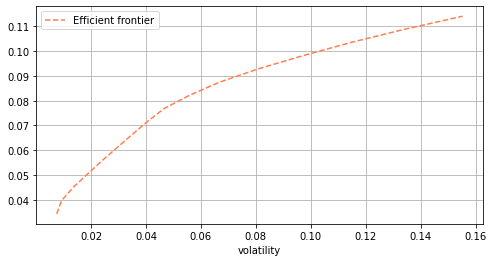

In [67]:
# plot the efficient frontier (single-regime)
df = mod1.efficient_frontier(16, rets, rets.cov(), periods_per_year=12, iplot=True)

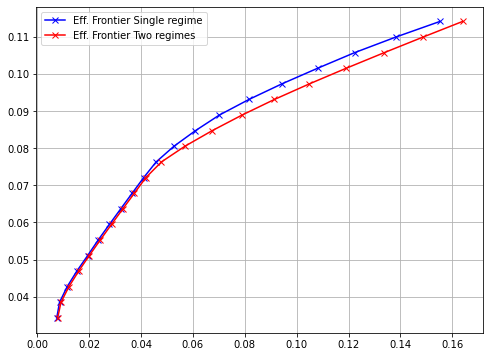

In [68]:
# compute the efficient frontier with two-regimes 
ann_rets_g = mod1.annualize_rets(rets_g, periods_per_year=12)
ann_rets_c = mod1.annualize_rets(rets_c, periods_per_year=12)
ax = mla.efficient_frontier_two_regimes(rets, rets_g, rets_c, periods_per_year=12, n_ports=20, n_scenarios=10000, figx=8, figy=6)

### Simulate regime-based returns and portfolio wealth

In [89]:
n_years = 50
n_scenarios = 100
regime_name = "Regime-9"
r_all = mla.regime_based_simulated_rets(rets, rets_g, rets_c, regime=regimes[regime_name], periods_per_years=12, 
                                        n_years=n_years, n_scenarios=n_scenarios) #, rand_seed=777)

In [70]:
r_all.shape

(600, 8, 100)

In [71]:
# assuming fixed holdings
holdings = np.array([0.5, 0.2, 0.05, 0.1, 0.05, 0.0333, 0.3333, 0.03333])

# portfolio wealths 
portfolio_sim = mla.simulate_fund_wealth(r_all, rets.columns, holdings, start=100)

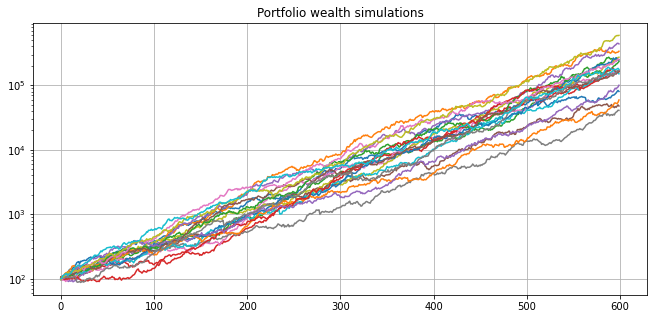

In [72]:
fig, ax = plt.subplots(1,1,figsize=(11,5))
# plot first 20 wealth
portfolio_sim.iloc[:,:20].plot(ax=ax, grid=True, logy=True, legend=False, title="Portfolio wealth simulations")
plt.show()

### Simulate portfolio wealth given original returns 

In [75]:
rets_orig = np.zeros((rets.shape[0], rets.shape[1], 1))
rets_orig[:,:,0] = rets.values

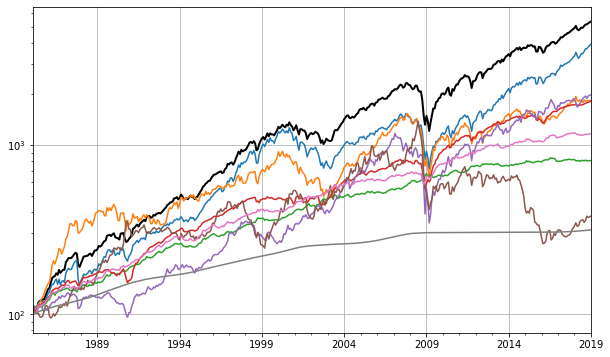

In [78]:
# assuming fixed holdings
holdings = np.array([0.5, 0.2, 0.05, 0.1, 0.05, 0.0333, 0.3333, 0.03333])

# portfolio wealths 
portfolio_sim = mla.simulate_fund_wealth(rets_orig, rets.columns, holdings, start=100)
portfolio_sim.index = rets.index

# plot
fig, ax = plt.subplots(1,1,figsize=(10,6))
portfolio_sim.plot(ax=ax, grid=True, logy=True, color="k", linewidth=2, label="Portfolio wealth simulations",legend=False)
mod1.compound_returns(rets,start=100).plot(ax=ax, grid=True, logy=True, legend=False)
plt.show()

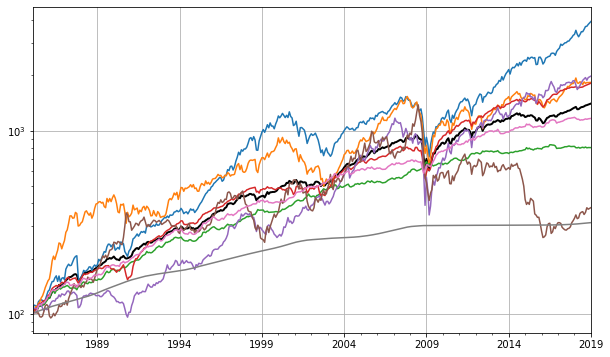

In [79]:
# assuming fixed holdings: EW portfolio
holdings = np.repeat(1/8, 8) 

# portfolio wealths 
portfolio_sim = mla.simulate_fund_wealth(rets_orig, rets.columns, holdings, start=100)
portfolio_sim.index = rets.index

# plot
fig, ax = plt.subplots(1,1,figsize=(10,6))
portfolio_sim.plot(ax=ax, grid=True, logy=True, color="k", linewidth=2, label="Portfolio wealth simulations",legend= False)
mod1.compound_returns(rets,start=100).plot(ax=ax, grid=True, logy=True, legend=False)
plt.show()

### References

1. **W. Mitchell and A. Burns.** "Statistical Indicators of Cyclical Revivals", _National Bureau of Economic Research,_ 1938. <a class="anchor" id="a"></a>

2. **J. H. Stock and M. W. Watson.** "New Indexes of Coincedent and Leading Economic Indicators", _NBER Macroeconomics Annual,_ 1989. <a class="anchor" id="b"></a> 

3. **A. Estrella and F. S. Mishkin.** "Predicting U.S. Recessions: Financial Variables as Leading Indicators", _Review of Economics and Statistics,_ 1998. <a class="anchor" id="c"></a>

4. **D. Chionis, P. Gogas and I. Pragidis.** "Predicting Euroepan Union Recessions in the Euro Era: the Yield Curve as a Forecasting Tool of Economic Activity", _International Advances in Economic Research,_ 2009. <a class="anchor" id="d"></a>

5. **S. Ng.** "Viewpoint: Boosting Recessions", _Canadian Journal of Economics,_ 2014. <a class="anchor" id="e"></a>

6. **W. Liu and E. Moench** "What Predicts US Recessions?", _International Journal of Forecasting,_ 2016. <a class="anchor" id="f"></a>

7. **M. Y. Huang, R. R. Rojas and P. D. Convery.** " News Sentiment as Leading Indicators for Recessions", _arXiv,_ 2018. <a id="g"></a>

8. **M. McCracken and S. Ng** "__[FRED-MD: A Monthly Database for Macroeconomic Research](https://research.stlouisfed.org/econ/mccracken/fred-databases/)__", _Working Paper,_ 2015.  <a class="anchor" id="i"></a>